In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric
# df = pd.read_csv("METABRIC_RNA_Mutation.csv", low_memory = False)

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.shape

(569, 33)

In [5]:
df.sample(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
350,899187,B,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.011620,...,19.74,83.61,542.5,0.09958,0.06476,0.030460,0.04262,0.2731,0.06825,NaN
129,866674,M,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.254500,0.114900,...,33.58,148.70,1589.0,0.12750,0.38610,0.567300,0.17320,0.3305,0.08465,NaN
229,881861,M,12.83,22.33,85.26,503.2,0.10880,0.17990,0.169500,0.068610,...,30.15,105.30,706.0,0.17770,0.53430,0.628200,0.19770,0.3407,0.12430,NaN
530,91858,B,11.75,17.56,75.89,422.9,0.10730,0.09713,0.052820,0.044400,...,27.98,88.52,552.3,0.13490,0.18540,0.136600,0.10100,0.2478,0.07757,NaN
321,894618,M,20.16,19.66,131.10,1274.0,0.08020,0.08564,0.115500,0.077260,...,23.03,150.20,1657.0,0.10540,0.15370,0.260600,0.14250,0.3055,0.05933,NaN
368,9011971,M,21.71,17.25,140.90,1546.0,0.09384,0.08562,0.116800,0.084650,...,26.44,199.50,3143.0,0.13630,0.16280,0.286100,0.18200,0.2510,0.06494,NaN
499,91485,M,20.59,21.24,137.80,1320.0,0.10850,0.16440,0.218800,0.112100,...,30.76,163.20,1760.0,0.14640,0.35970,0.517900,0.21130,0.2480,0.08999,NaN
289,89143601,B,11.37,18.89,72.17,396.0,0.08713,0.05008,0.023990,0.021730,...,26.14,79.29,459.3,0.11180,0.09708,0.075290,0.06203,0.3267,0.06994,NaN
327,895299,B,12.03,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,...,22.25,82.74,523.4,0.10130,0.07390,0.007732,0.02796,0.2171,0.07037,NaN
56,857637,M,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.132300,0.089940,...,28.14,170.10,2145.0,0.16240,0.35110,0.387900,0.20910,0.3537,0.08294,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#Exploratory Data Analysis
#There are no missing values
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [8]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [10]:
df.value_counts(['diagnosis'])

diagnosis
B            357
M            212
dtype: int64

In [11]:
df.duplicated().sum()

0

In [33]:
#Given is a binary classification problem where column "Diagnosis" is the label
df = df.rename(columns={'diagnosis':'Label'})
print(df.dtypes)

Label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

<AxesSubplot:xlabel='Label', ylabel='count'>

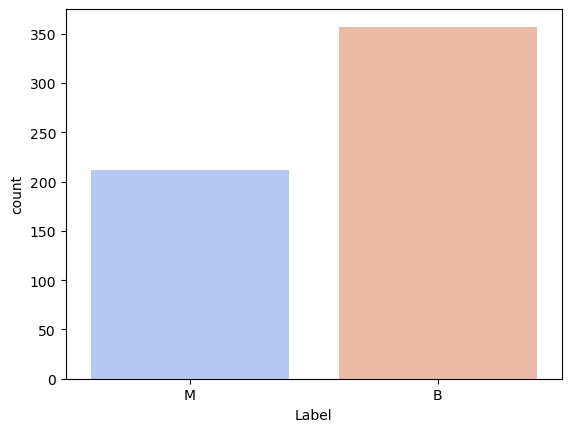

In [34]:
#Understanding using plots
sns.countplot(x="Label", data=df, palette = "coolwarm")

In [68]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

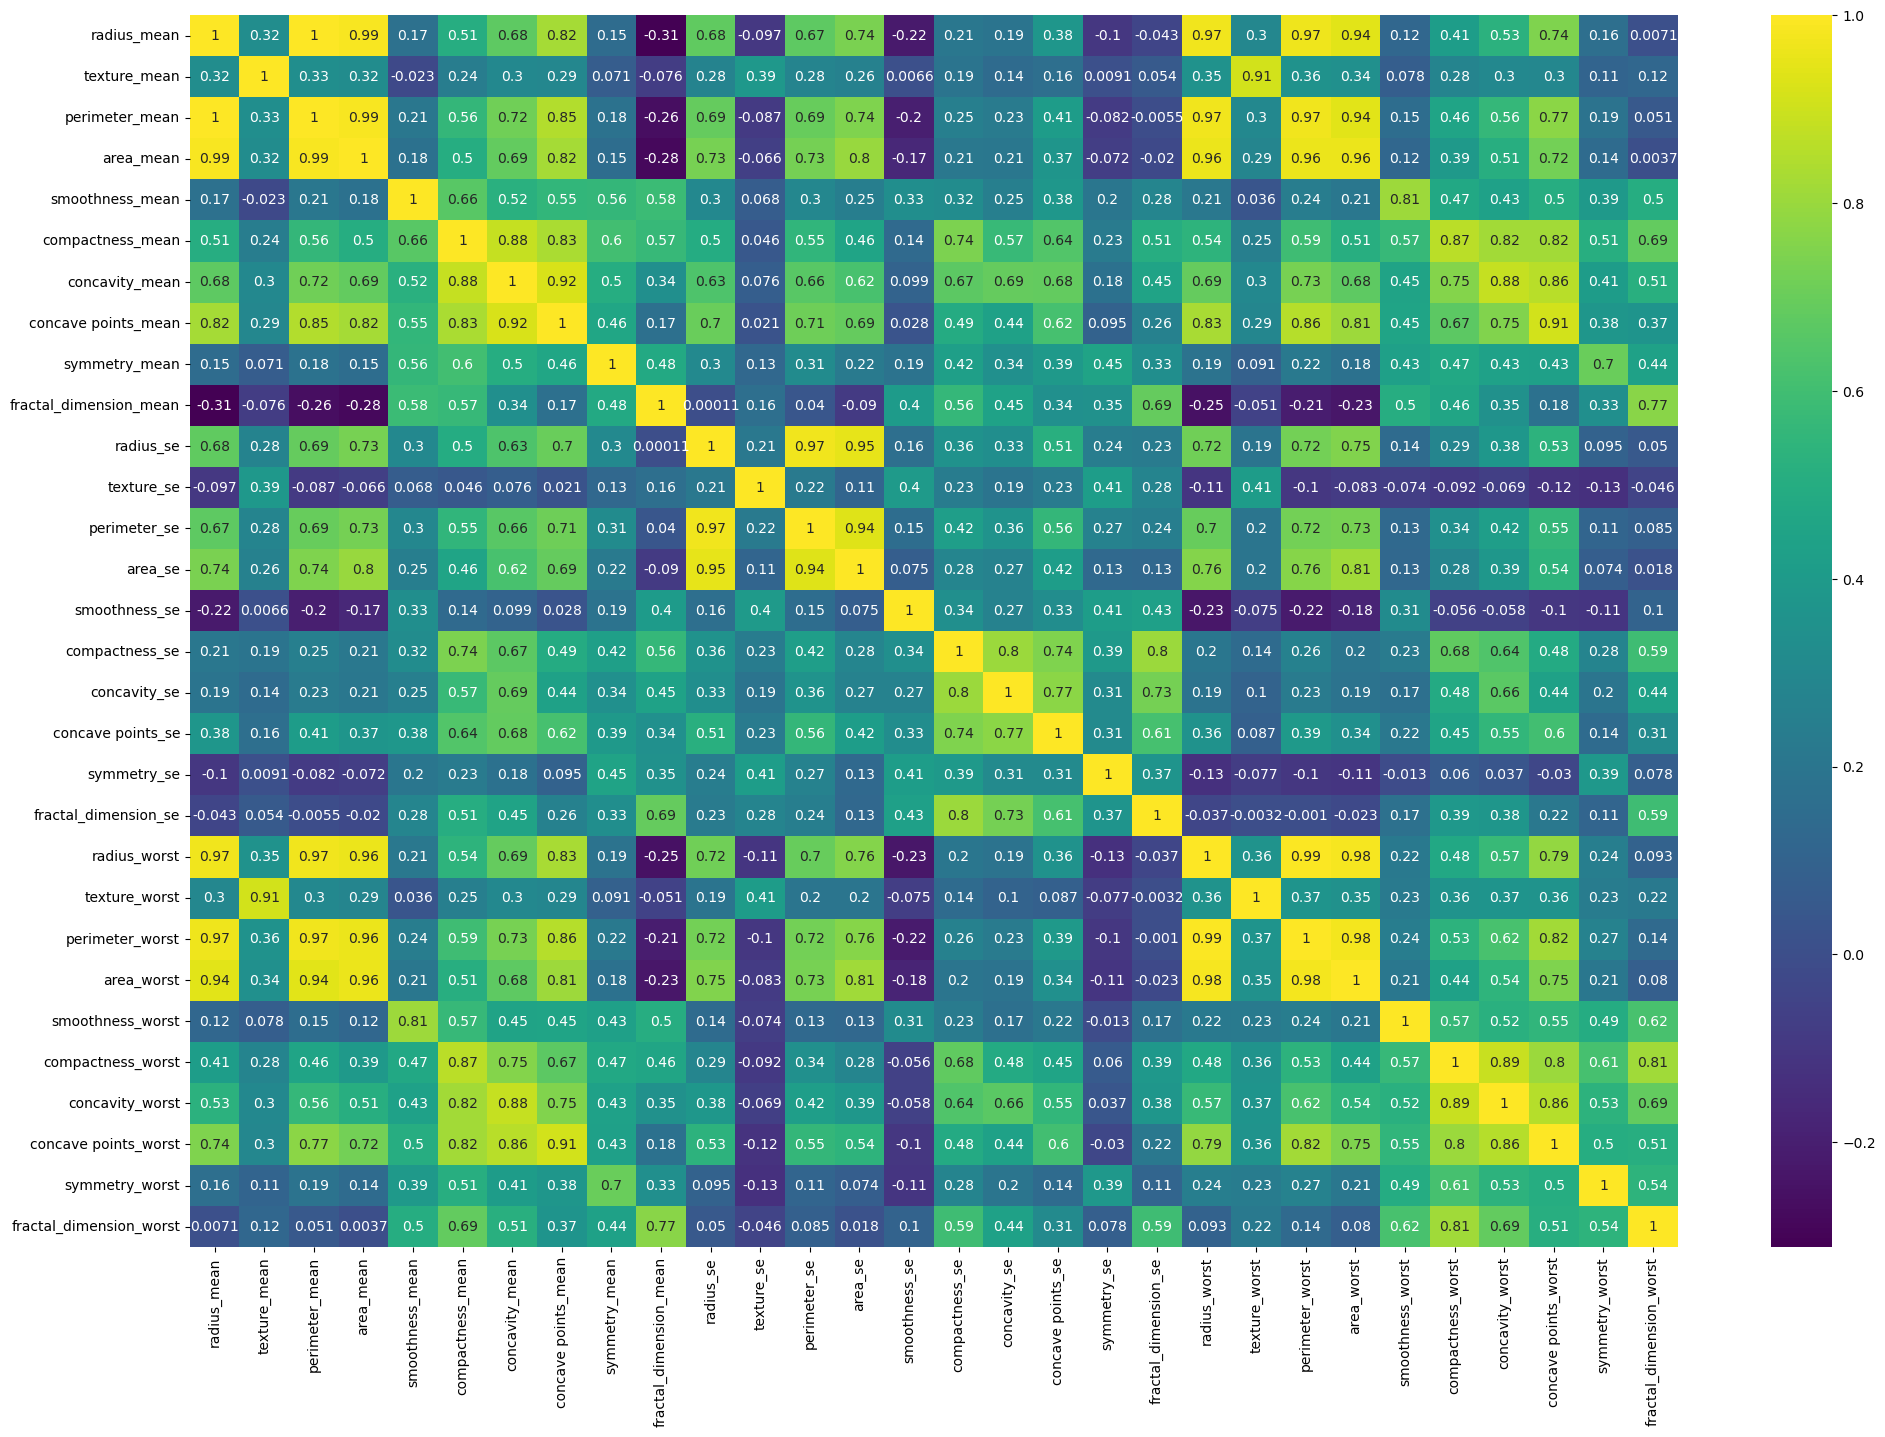

In [155]:
plt.figure(figsize = (24,16))
sns.heatmap(df.corr(), cmap = "viridis", annot = True)

In [69]:
y = df["Label"].values
print("Labels before encoding are: ", np.unique(y))

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Y))

Labels before encoding are:  ['B' 'M']
Labels after encoding are:  [0 1]


In [70]:
X = df.drop(labels = ["Label"], axis=1) 
print(X.describe().T)

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

In [71]:
#Values of X needs to be scaled for further processing to similar scale

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X) 

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [73]:
X_train.shape

(398, 30)

In [74]:
X_test.shape

(171, 30)

In [98]:
import warnings
warnings.filterwarnings('ignore')

# LOGISTIC REGRESSION

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [81]:
Lr=LogisticRegression()
Lr.fit(X_train,y_train)

LogisticRegression()

In [82]:
y_pred=Lr.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

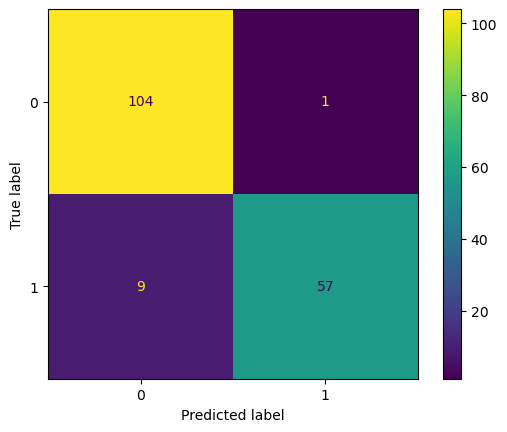

In [99]:
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(Lr, X_test, y_test)

In [83]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9415204678362573


In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       105
           1       0.98      0.86      0.92        66

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



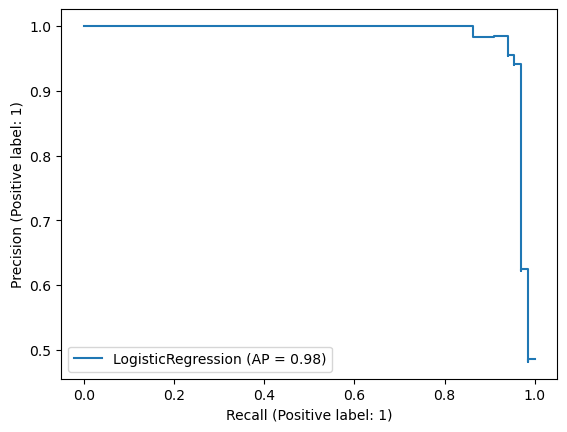

In [100]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
plot_precision_recall_curve(Lr, X_test, y_test)

# K-NEAREST NEIGHBOURS

In [92]:
knn = KNeighborsClassifier()

In [104]:
#Applying knn for neighbors value from 3 to 15
Accuracy = []
for i in range(3,16):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred2=KNN.predict(X_test)
    Accuracy.append(accuracy_score(y_test, y_pred2))

In [105]:
print("Max accuracy for knn is : " , max(Accuracy))

Max accuracy for knn is :  0.9707602339181286


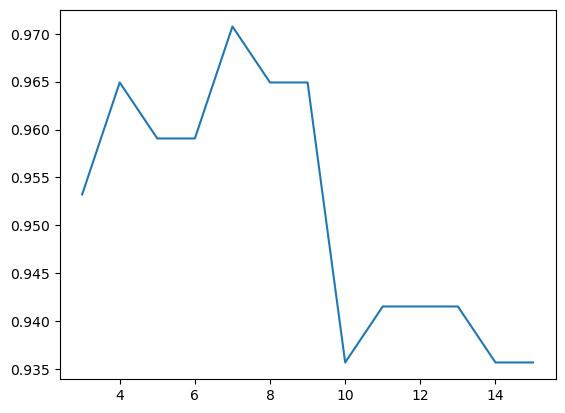

In [106]:
plt.plot(range(3,16),Accuracy)

In [157]:
#In above plot, it is visible that maximum accuracy in knn is at k = 7
KNN=KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train,y_train)
y_pred2=KNN.predict(X_test)
# print(accuracy_score(y_test, y_pred2))
print(classification_report(y_test,y_pred2))

0.9707602339181286
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       105
           1       0.98      0.94      0.96        66

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# DECISION TREE

In [111]:
Dt = DecisionTreeClassifier()
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [113]:
base_pred = Dt.predict(X_test)

In [114]:
confusion_matrix(y_test,base_pred)

array([[98,  7],
       [ 6, 60]], dtype=int64)

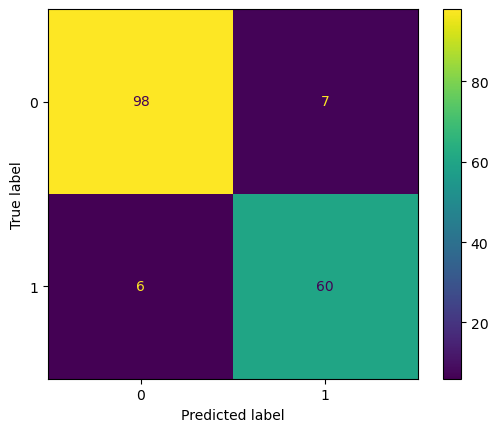

In [115]:
plot_confusion_matrix(Dt,X_test,y_test)

In [116]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       105
           1       0.90      0.91      0.90        66

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



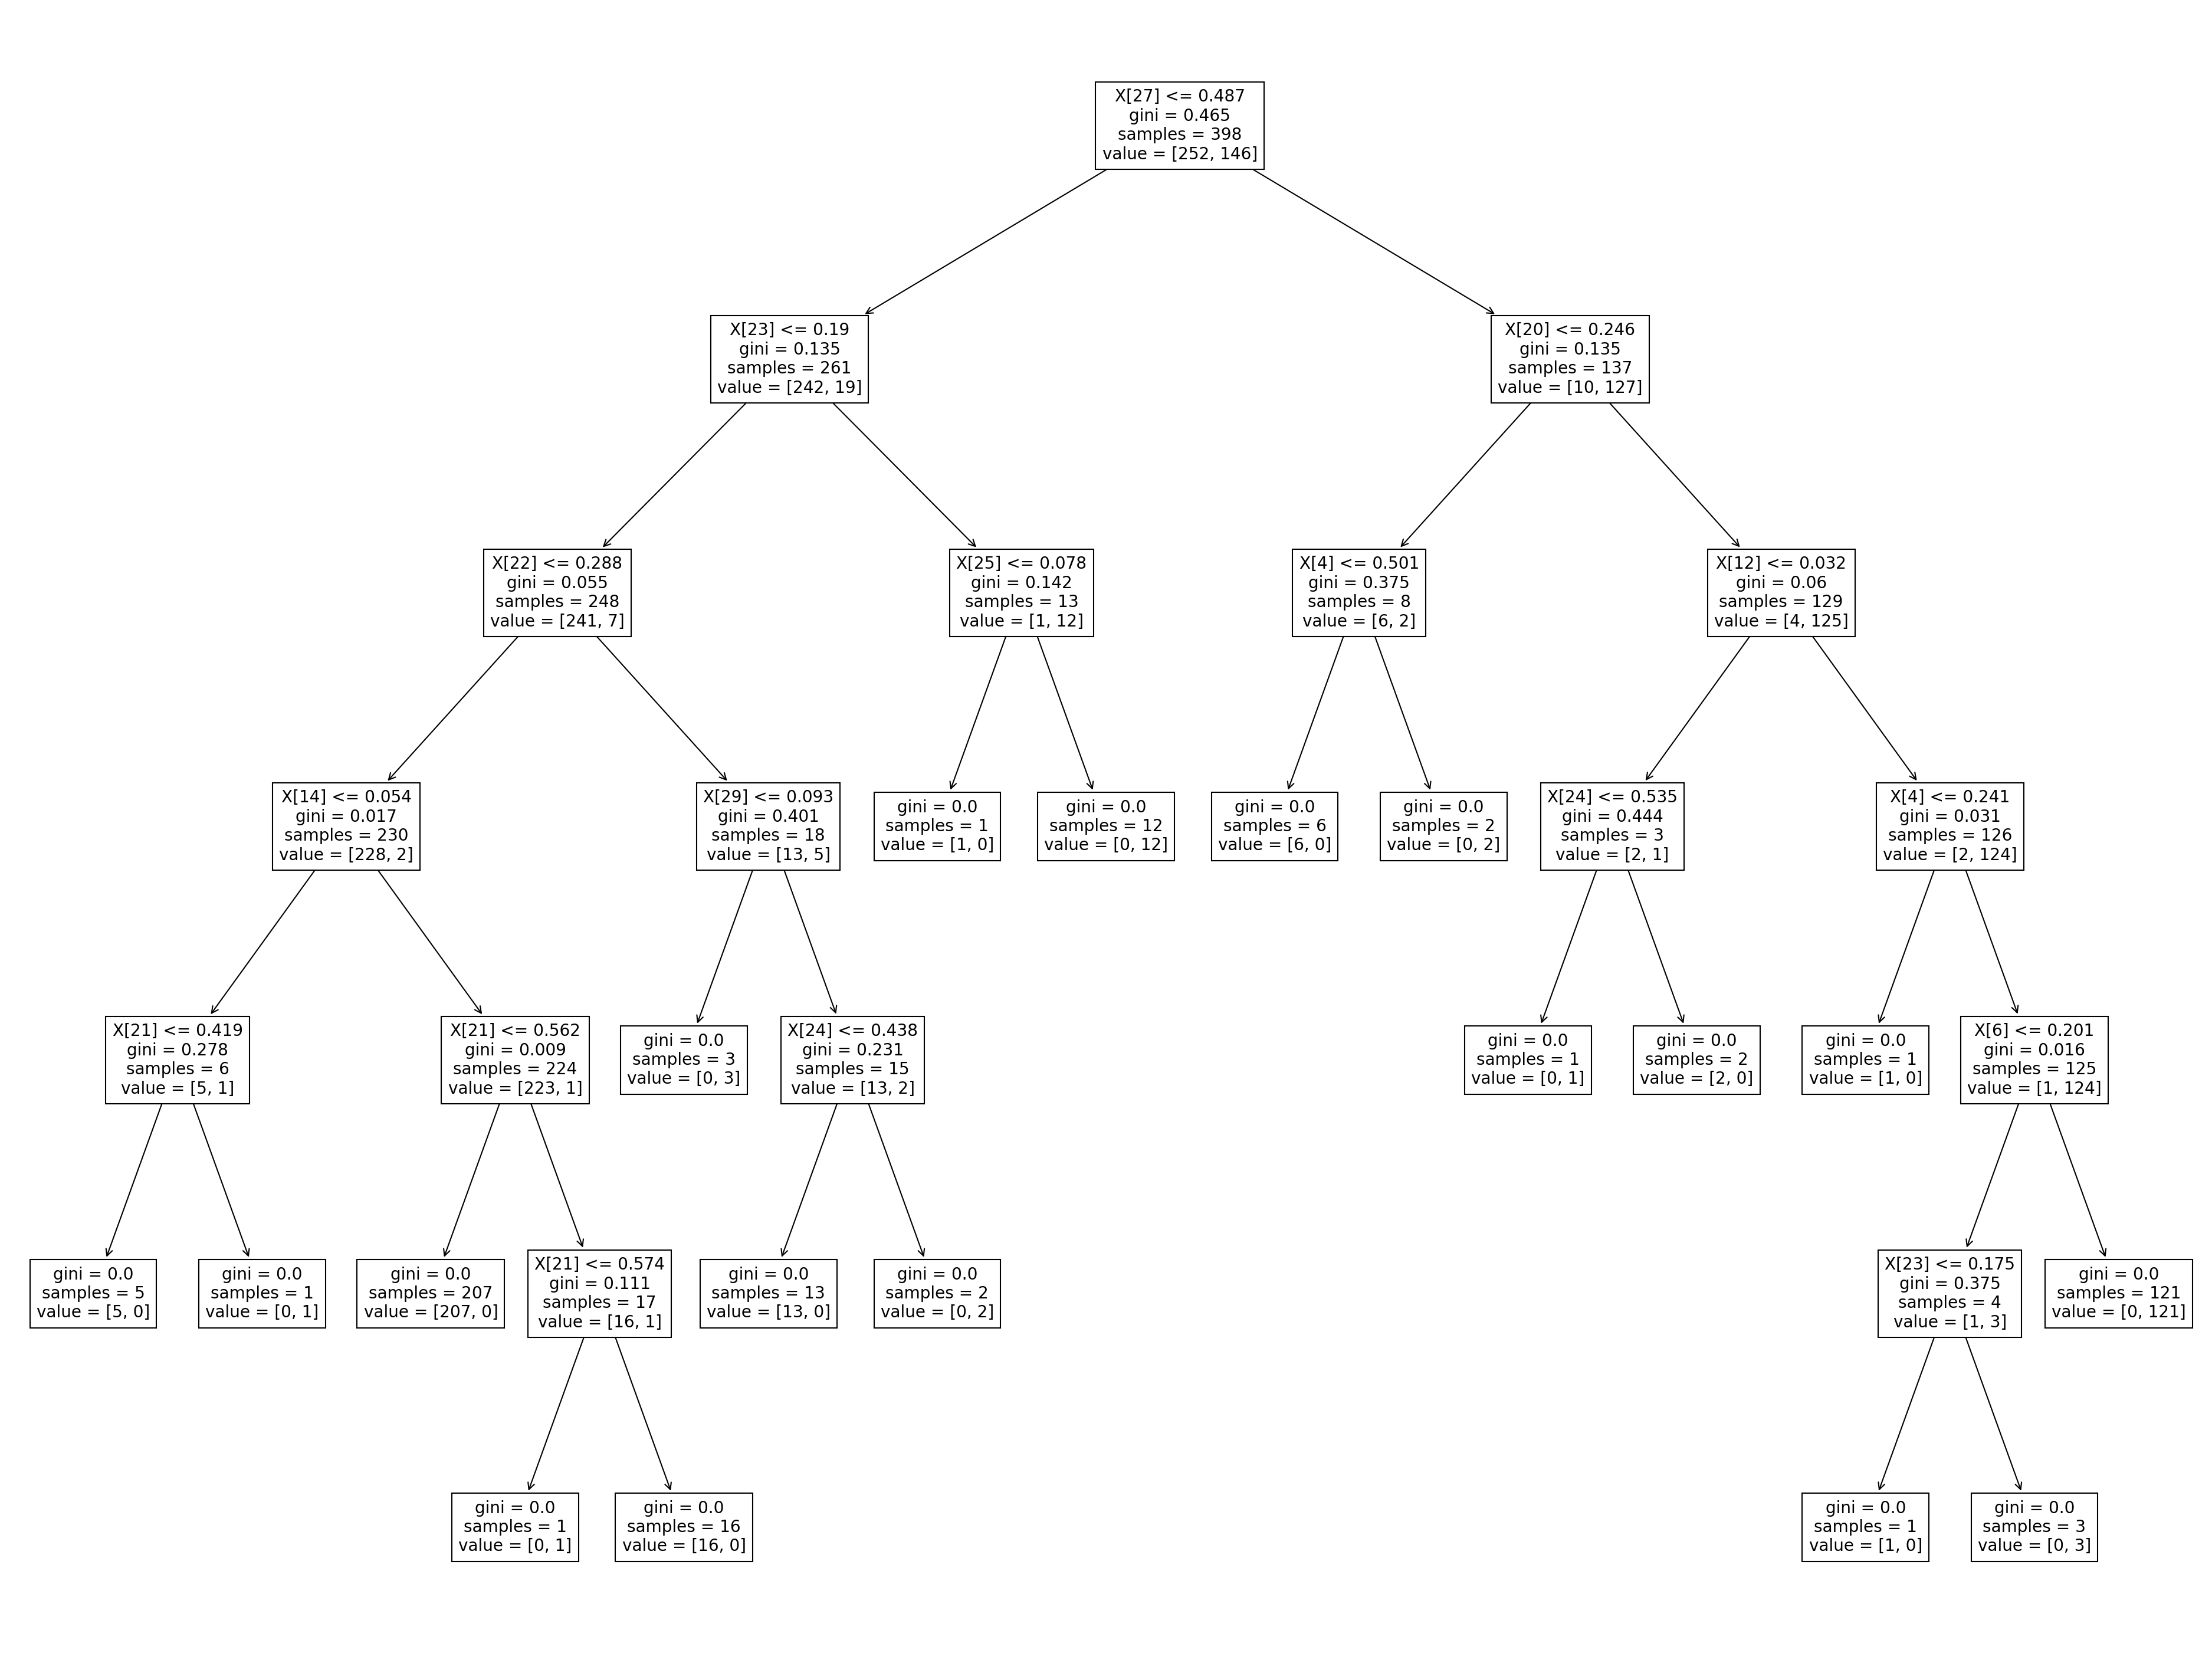

In [161]:
from sklearn.tree import plot_tree
plt.figure(figsize=(32,24), dpi = 150)
plot_tree(Dt);

In [132]:
print("Accuracy is : " , accuracy_score(y_test, base_pred))

Accuracy is :  0.9239766081871345


# Random Forests

In [133]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
rf.fit(X_train,y_train)
y_predrf = rf.predict(X_test)

In [134]:
confusion_matrix(y_test,y_predrf)

array([[100,   5],
       [  7,  59]], dtype=int64)

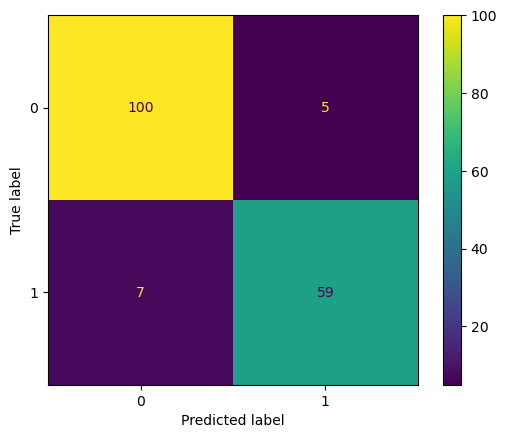

In [135]:
plot_confusion_matrix(rf,X_test,y_test)

In [136]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

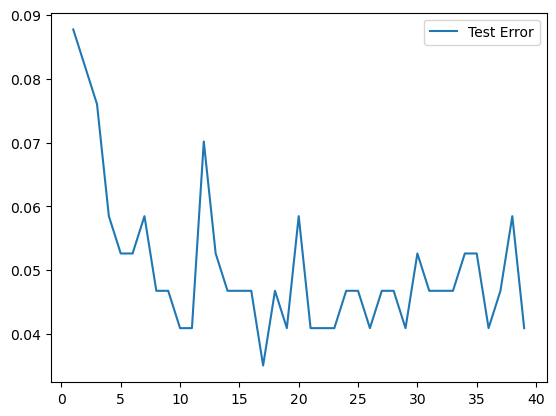

In [137]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

In [152]:
#Best results are for around 18 trees
model = RandomForestClassifier(n_estimators=18,max_features='auto')
model.fit(X_train,y_train)
test_preds = model.predict(X_test)
Test_Error = 1 - accuracy_score(test_preds, y_test)

In [153]:
print("Accuracy score in this algorithm is : ", accuracy_score(test_preds, y_test))

Accuracy score in this algorithm is :  0.9532163742690059


# ADABOOST

In [162]:
from sklearn.ensemble import AdaBoostClassifier

error_rates = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

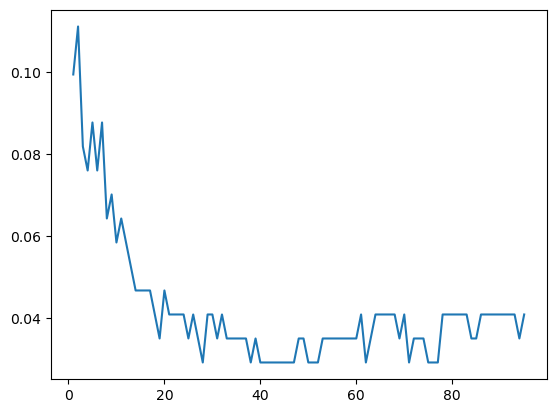

In [163]:
plt.plot(range(1,96),error_rates)

In [175]:
#This model performs best for estimators value = 74
ada = AdaBoostClassifier(n_estimators=74)
ada.fit(X_train,y_train)
ada_predictions = ada.predict(X_test)

In [176]:
print(classification_report(y_test,ada_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       105
           1       0.95      0.95      0.95        66

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



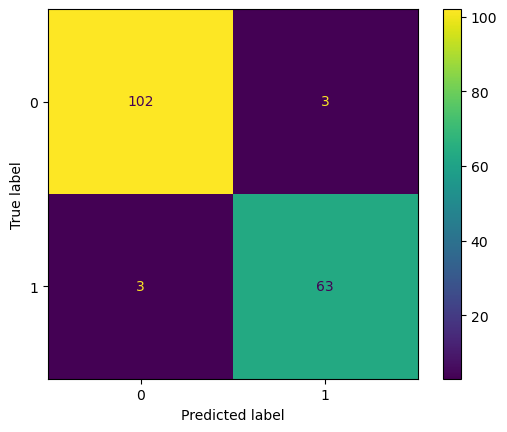

In [177]:
plot_confusion_matrix(ada,X_test,y_test)

In [178]:
print("Accuracy score in this algorithm is : ", accuracy_score(ada_predictions, y_test))

Accuracy score in this algorithm is :  0.9649122807017544


# CONCLUSION

The best ML algorithm for the breast cancer prediction is found to be K-Nearest Neighbors with accuracy score of 0.9707602339181286